In [ ]:
import numpy as np
import vpython as vp

M_wasp55b = 5.38535e-4
M_wasp55 = 1.0

G_grav = 4.0*np.pi**2.0

def F_gravity(r, m=M_wasp55b, M=M_wasp55):
    rr = np.sum(r*r)
    rhat = r/np.sqrt(rr)
    return -G_grav*m*M/rr * rhat

def vp_planet_orbit(t_max=1, r0=np.array([1.217, 0.0, 0.0]), v0=np.array([0.0, 6.179, 0.0]), mass=M_wasp55b, M = M_wasp55, dt=0.001):
    """Visualize 2D planetary motion with velocity verlet
    NB: the mass and radius of WASP55 have been normalized
    to 1, which has been used to calculate the normalized 
    radius and mass of WASP55b.
    ----------
    Distance is in AU and velocity is in AU/year
    
    0.14396  22.31
    ----------
    """
    nsteps = int(t_max/dt)
    time = dt * np.arange(nsteps)
    dim = len(r0)
    assert len(v0) == dim

    r = np.array(r0, copy=True)
    v = np.array(v0, copy=True)
    
    scene = vp.display(title="WASP-55b around WASP-55",background=vp.color.black,
                      forward=vp.vec(0.0, 2.0, -1.0))
    planet = vp.sphere(pos=vp.vector(*r), radius=0.1, make_trail=True,
                      up=vp.vec(0.0, 0.0, 1.0))
    wasp55 = vp.sphere(pos=vp.vector(0.0, 0.0, 0.0), radius = 1.0, color=vp.color.red,
                    emissive=True)
    wasp55_light = vp.local_light(pos=vp.vec(0., 0., 0.), color=vp.color.red)
                       
    # start force evaluation for first step
    Ft = F_gravity(r, m=mass)
    while True:
        vhalf = v + 0.5*dt * Ft/mass
        r += dt * vhalf
        Ftdt = F_gravity(r, m=mass)
        v = vhalf + 0.5*dt * Ftdt/mass
        # new force becomes old force
        Ft = Ftdt
        
        vp.rate(100.)
        planet.pos = vp.vec(*r)

    x = np.arange(0.,1.,0.1)
    mu = (1. - x)**0.5
    flux_deficit = ((mu + (2/3))*planet.radius**2)/((4/3)*wasp55.radius**2)
    
    return time, r, v
    
vp_planet_orbit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
def flux_deficit(R_pl = 0.1, R = 1.):
    x = np.arange(0.,1.,0.1)
    mu = (1. - x)**0.5
    flux_deficit = ((mu + (2/3))*R_pl**2)/((4/3)*R**2)
    return flux_deficit
flux_deficit().shape

(10,)

ERROR! Session/line number was not unique in database. History logging moved to new session 1033


In [2]:
"""Transit time"""
p = 385827.84 # orbital period in seconds
b = 0.15 # impact parameter
a = 7829770 # semi-major axis in Au is 0.0533, value used given in km
R = np.arange(0., 1.,0.1)
R_pl = 0.1

T_duration = (p/(np.pi))*np.arcsin((((R + R_pl)**2 - (b*R)**2)**0.5)/a)
T_duration.shape

(10,)

In [3]:
"""Luminosity calculation"""
x = np.arange(0.,1.,0.1)
Rx = np.arange(0., 1.0, 0.1)
M_wasp55 = 1.0
rho = M_wasp55/((4.0/3.0)*(np.pi)*(Rx)**3)
sigma = 5.6704e-05 # in cgs
T_eff = 6000 # in Kelvins
L = ((4*np.pi)*Rx**2)*sigma*(0.75*(T_eff**4)*(rho*x + (2/3)))
L.shape

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in multiply


(10,)

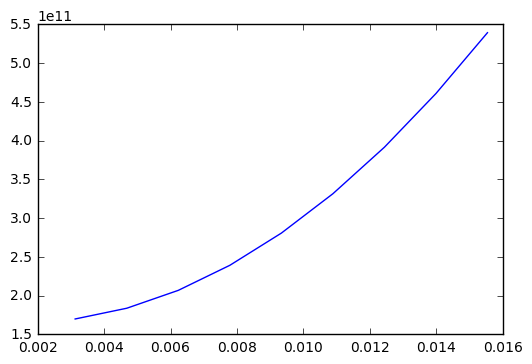

In [4]:
import matplotlib.pyplot as plt

plt.plot(T_duration, L)
plt.show()

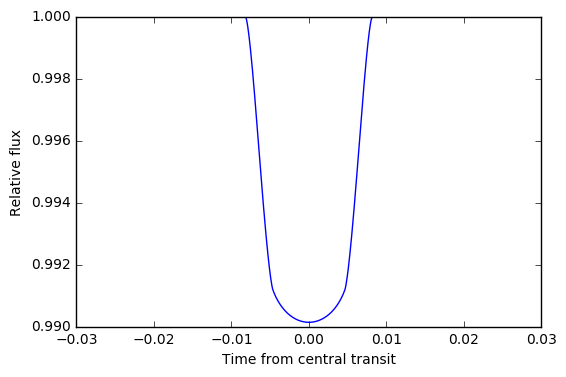

In [5]:
import batman
import matplotlib.pyplot as plt

params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 1.                       #orbital period
params.rp = 0.1                       #planet radius (in units of stellar radii)
params.a = 15.                        #semi-major axis (in units of stellar radii)
params.inc = 87.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients

t = np.linspace(-0.025, 0.025, 1000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)

plt.plot(t, flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()